# # Taks 1: Data scraping



**XJTLU**<br>
**Name:** Yuting Wang <br>
**ID:** 2143459 <br>

# Python Web Scraping: Extracting Movie Data from TMDb and Saving to CSV
The provided Python script is a web scraping tool designed to extract movie information from The Movie Database (TMDb). Here's a detailed explanation of the script, supplemented with insights from relevant literature and resources:

Web Scraping Fundamentals:
Web scraping is the process of programmatically extracting data from websites. It involves sending HTTP requests to fetch web pages and then parsing the HTML content to extract desired information. Python is a popular choice for web scraping due to its simplicity and the powerful libraries it offers, such as requests for HTTP requests and BeautifulSoup for parsing HTML content 
.

Libraries and Tools:

requests: A simple and elegant library for making HTTP requests. It's used in the script to retrieve web pages from TMDb 
.
BeautifulSoup: A library for parsing HTML and XML documents. It provides methods for navigating, searching, and modifying the parse tree, which makes it easy to extract data from web pages 
.
csv: A module for reading and writing CSV files, which is used in the script to save the extracted movie data 
.
Scraping Movie Links:
The get_movie_links function iterates over multiple pages on TMDb, sending requests to collect movie links. This is done by constructing URLs for each page and parsing the HTML to find href attributes within anchor tags (<a>), which often contain the URLs for individual movie pages 
.

Extracting Movie Details:
The scrape_movie_details function takes a movie link, retrieves the page, and extracts detailed information such as title, year, score, description, director, scriptwriter, type, and income. This is done by parsing the HTML structure of the movie page and locating the relevant elements using selectors 
.

Data Cleaning and Normalization:
The script uses regular expressions (re module) to clean and normalize the extracted text data, removing special characters and unnecessary whitespace. This step is crucial for ensuring the quality of the collected data 
.

Saving Data to CSV:
The save_to_csv function checks if the movie's title already exists in the CSV file to avoid duplicates. If it doesn't exist, the movie's details are appended to the CSV file. This function utilizes the csv.DictWriter class to map dictionaries onto output rows in the CSV file 
.

Legal and Ethical Considerations:
When scraping websites, it's important to respect the website's robots.txt file, which specifies the rules for scraping and crawling 
. Additionally, scrapers should avoid collecting personal data, adhere to the website's terms of service, and ensure that the data collected does not violate copyright laws 
.

Performance and Scalability:
The script is designed to be efficient and scalable, capable of handling multiple pages and extracting data from each movie page. However, it's crucial to manage the request rate to avoid overwhelming the website's server, which could lead to being blocked or facing legal repercussions 
.

Conclusion:
The script is a practical example of how to use Python for web scraping, showcasing the process of fetching, parsing, and storing data. It highlights the importance of using web scraping responsibly and ethically, respecting the website's rules and copyright laws 
.

For further reading and detailed documentation on the libraries used in the script, you can refer to the following resources:
- Beautiful Soup Documentation: [Beautiful Soup 4.4.0 documentation](https://beautiful-soup-4.readthedocs.io/en/latest/) 
- CSV Module Tutorial: [csv — CSV File Reading and Writing](https://docs.python.org/3/library/csv.html) 
- Web Scraping With Python: [Web Scraping With Python | Advanced Guide](https://scrape.do/blog/web-scraping-with-python-advanced-guide/) 
- Legal and Ethical Considerations: [Legal and Ethical Considerations - Python Web Scraping](https://monashdatafluency.github.io/python-web-scraping/section-5-legal-and-ethical-considerations/)

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import re
import time

# Store unique movie links
movie_links = set()

# Function to get movie links
def get_movie_links():
    try:
        for page_num in range(1, 12):  # Limit to the first 11 pages
            url = f'https://www.themoviedb.org/movie?language=en-US&page={page_num}'
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'html.parser')

            for link in soup.select('h2 a'):
                href = link['href']
                movie_links.add(f'https://www.themoviedb.org{href}')  # Full link

            print(f"Page {page_num} links retrieved.")

    except Exception as e:
        print(f"Error scraping movie links: {e}")

# Function to scrape movie details
def scrape_movie_details(link):
    try:
        response = requests.get(link)
        soup = BeautifulSoup(response.text, 'html.parser')

        movie_title = soup.select_one('h2 a').text
        movie_year = soup.select_one('h2 span').text
        movie_score = soup.select_one('div.user_score_chart')['data-percent']
        # Clean Description
        movie_description = soup.select_one('div.overview p').text.strip()
        movie_description = re.sub(r'\s+', ' ', movie_description)  # Replace multiple spaces with a single space
        movie_description = re.sub(r'[\uFFFD\u2013\u2014\u2028\u2029]', '', movie_description)  # Remove special characters
        movie_description = re.sub(r'[^\x00-\x7F]+', '', movie_description)

        # Find character information
        container = soup.select_one('#original_header div:nth-of-type(2) section div:nth-of-type(3) ol')
        character_elements = container.select('p.character')

        director = None
        scriptwriter = None

        for element in character_elements:
            if 'Director' in element.text:
                director = element.find_previous('p').text
            elif 'Writer' in element.text:
                scriptwriter = element.find_previous('p').text

        director = re.sub(r'\s+', ' ', director) if director else "N/A"
        director = re.sub(r'[\uFFFD\u2013\u2014\u2028\u2029]', '', director)  # Remove special characters
        director = re.sub(r'[^\x00-\x7F]+', '', director)
        scriptwriter = re.sub(r'\s+', ' ', scriptwriter) if scriptwriter else "N/A"
        scriptwriter = re.sub(r'[\uFFFD\u2013\u2014\u2028\u2029]', '', scriptwriter)  # Remove special characters
        scriptwriter = re.sub(r'[^\x00-\x7F]+', '', scriptwriter)

        movie_type = soup.select_one(
            '#original_header div:nth-of-type(2) section div:nth-of-type(1) div span:nth-of-type(3)').text

        # Use regex to remove all non-standard spaces and special characters
        movie_type = re.sub(r'\s+', ' ', movie_type).strip()  # Replace multiple spaces with a single space
        movie_type = ', '.join(part.strip() for part in movie_type.split(','))

        # Get income information
        income_info = soup.select_one('#media_v4 div div div:nth-of-type(2) div section div:nth-of-type(1) div section p:nth-of-type(4)').text
        match1 = re.search(r'\$\d+(?:,\d{3})*(?:\.\d+)?', income_info)
        Income1 = float(match1.group().replace('$', '').replace(',', '')) if match1 else 0

        shouru_info = soup.select_one('#media_v4 div div div:nth-of-type(2) div section div:nth-of-type(1) div section p:nth-of-type(3)').text
        match2 = re.search(r'\$\d+(?:,\d{3})*(?:\.\d+)?', shouru_info)
        Income2 = float(match2.group().replace('$', '').replace(',', '')) if match2 else 0

        Income_all = f"${(Income1 - Income2):,.2f}"

        return {
            "Title": movie_title,
            "Year": movie_year.strip("()"),
            "Score": movie_score,
            "Description": movie_description,
            "Director": director,
            "Scriptwriter": scriptwriter,
            "Type": movie_type,
            "Income": Income_all,
        }
    except Exception as e:
        print(f"Error getting movie details from {link}: {e}")
        return None

# Function to save data to CSV file
def save_to_csv(data, filename):
    if not data:
        print("No data to save.")
        return

    existing_titles = set()
    try:
        with open(filename, 'r', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            existing_titles = {row['Title'] for row in reader}
    except FileNotFoundError:
        pass

    if data['Title'] not in existing_titles:
        print(f"Saving data to CSV file: {filename}")
        try:
            with open(filename, 'a', newline='', encoding='utf-8') as csvfile:
                fieldnames = ['Title', 'Year', 'Score', 'Description', 'Director', 'Scriptwriter', 'Type', 'Income']
                writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

                if csvfile.tell() == 0:
                    writer.writeheader()

                writer.writerow(data)
                print(f"Wrote data: {data}")
        except Exception as e:
            print(f"Failed to save data to CSV: {e}")

# Execute the scraping process
try:
    get_movie_links()  # Scrape all movie links
    print(f"Total movie links collected: {len(movie_links)}")  # Debug: Check the number of links

    for link in movie_links:
        details = scrape_movie_details(link)
        save_to_csv(details, 'movies_data111.csv')  # Immediately save to CSV file

finally:
    print("Scraping completed.")


Page 1 links retrieved.
Page 2 links retrieved.
Page 3 links retrieved.
Page 4 links retrieved.
Page 5 links retrieved.
Page 6 links retrieved.
Page 7 links retrieved.
Page 8 links retrieved.
Page 9 links retrieved.
Page 10 links retrieved.
Page 11 links retrieved.
Total movie links collected: 220
Saving data to CSV file: movies_data111.csv
Wrote data: {'Title': 'Beetlejuice Beetlejuice', 'Year': '2024', 'Score': '72', 'Description': "After a family tragedy, three generations of the Deetz family return home to Winter River. Still haunted by Betelgeuse, Lydia's life is turned upside down when her teenage daughter, Astrid, accidentally opens the portal to the Afterlife.", 'Director': 'Tim Burton', 'Scriptwriter': 'N/A', 'Type': 'Comedy, Fantasy, Horror', 'Income': '$335,300,598.00'}
Saving data to CSV file: movies_data111.csv
Wrote data: {'Title': 'Female Ninjas Magic Chronicles 3: Sacred Book of Sexual Positions', 'Year': '1993', 'Score': '75', 'Description': 'The government is worried 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager


The Revenue column is cleaned by removing dollar signs and commas, which are common in financial data representation. This is done using the replace method with regex=True to handle the replacement as a regular expression. After cleaning, the Revenue column is converted to a floating-point number data type using astype(float). The Rating column is converted to a numeric data type using pd.to_numeric, with any non-convertible values being set to NaN (not a number) due to the errors='coerce' parameter. The Year column is converted to an integer data type using astype(int). Displaying the First 10 Rows:

df.head(10) is used to display the first 10 rows of the DataFrame. This is a quick way to inspect the initial rows of the dataset to verify that the data has been read and cleaned as expected. This code snippet is a practical example of data preparation tasks in data analysis, including setting up font properties for non-Latin scripts, reading and cleaning data, and performing initial data exploration. It's a common practice in data science to ensure data is in the correct format and clean before proceeding with further analysis or visualization.

In [5]:

# Set Chinese font
font_path = r"C:\Windows\Fonts\simsun.ttc"
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Read CSV file
file_path = './movies_data111.csv'
df = pd.read_csv(file_path, header=None, names=['Title', 'Year', 'Rating', 'Description', 'Director', 'Writer', 'Genres', 'Revenue'])

# Clean revenue and rating
df['Revenue'] = df['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Ensure the Revenue column contains only numbers, remove non-numeric rows
df = df[pd.to_numeric(df['Revenue'], errors='coerce').notna()]
df['Revenue'] = df['Revenue'].astype(float)

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Year'] = df['Year'].astype(int)

# Create a new DataFrame for formatted display
df_display = df.copy()
df_display['Revenue'] = df_display['Revenue'].apply(lambda x: f"${x:,.2f}")  # Add dollar sign

# Display the first 10 rows of the formatted DataFrame
df_display.head(10)


,Title,Year,Rating,Description,Director,Writer,Genres,Revenue
1,LEGO Marvel Avengers: Mission Demolition,2024,76,"A young, aspiring hero and superhero fan inadv...",Ken Cunningham,Eugene Son,"Animation, Comedy, Science Fiction",$0.00
2,Outlaw,2024,60,"At the age of nine, Rebeca is sold by her gran...",Joo Wainer,Patrcia Andrade,"Action, Crime, Drama",$0.00
3,Kung Fu Panda 4,2024,71,Po is gearing up to become the spiritual leade...,Mike Mitchell,Darren Lemke,"Animation, Family, Fantasy, Action","$463,900,620.00"
4,Twisters,2024,70,"As storm season intensifies, the paths of form...",Lee Isaac Chung,NaN,"Thriller, Action","$214,590,675.00"
5,Saving Bikini Bottom: The Sandy Cheeks Movie,2024,68,"When Bikini Bottom is scooped from the ocean, ...",Liza Johnson,NaN,"Animation, Comedy, Adventure, Family","$-100,000,000.00"
6,Kelas Bintang - Hot Moms,2023,100,We don't have an overview translated in Englis...,NaN,NaN,"Drama, Romance",$0.00
7,MadS,2024,69,A teenager stops off to see his dealer to test...,David Moreau,NaN,1h 26m,$0.00
8,Terrifier,2011,63,After witnessing a brutal murder on Halloween ...,Damien Leone,NaN,19m,$0.00
9,Woman of the Hour,2024,67,An aspiring actress crosses paths with a proli...,Anna Kendrick,Ian McDonald,"Crime, Drama, Thriller",$0.00
10,Oh My Ghost : The Finale,2024,58,This new dormitory is located in the middle of...,Poj Arnon,NaN,"Comedy, Horror",$0.00


# Task 2

# Topic: What do you think is interesting about the data?


# Introduction
As a cinephile, I'm curious about which movie is the most popular one from different angles, for example; different types, different movies and so on. Meanwhile, I am also interested in the relationships between different attributes and the potential insights for movie industry it may bring.  To begin with, we will go through the data we already have, select the attributes and samples we are interested in, and make further analysis based on these data with visualization methods; finally, it will briefly conclude what we have found and give my answer for this question.

### Methods
To answer the question, we need to have a good understanding on what kinds of data are available, actually, this has been finished when we were doing the web scraping: 

In [6]:
df.dropna(subset=['Revenue', 'Rating'], inplace=True)
df.drop_duplicates(inplace=True)

# Ensure consistent casing in the Genres column and remove extra spaces and invisible characters
df['Genres'] = df['Genres'].str.lower().str.strip().replace(r'\s+', ' ', regex=True)
df['Genres'] = df['Genres'].str.replace(r'[^a-zA-Z0-9\s,]', '', regex=True)  # Remove non-alphanumeric characters

# Process dummy variables
genre_dummies = df['Genres'].str.get_dummies(sep=', ')
df = pd.concat([df, genre_dummies], axis=1)

# Calculate the average revenue for each genre
avg_revenue_by_genre = df.drop(['Title', 'Year', 'Rating', 'Description', 'Director', 'Writer', 'Revenue', 'Genres'], axis=1).mean().reset_index()
avg_revenue_by_genre.columns = ['Genre', 'Average Revenue']

# Summarize and plot
avg_revenue_by_genre = avg_revenue_by_genre.sort_values(by='Average Revenue', ascending=False).head(5)


## visualize the Data

### Bar Chart

When we want to reflect the popularity of a movie through its box office revenue, we can rank the average revenue of each type of movie.


In [7]:
avg_revenue_by_genre.head(10)

,Genre,Average Revenue
15,action,0.389831
30,thriller,0.288136
16,adventure,0.245763
25,horror,0.241525
21,drama,0.224576


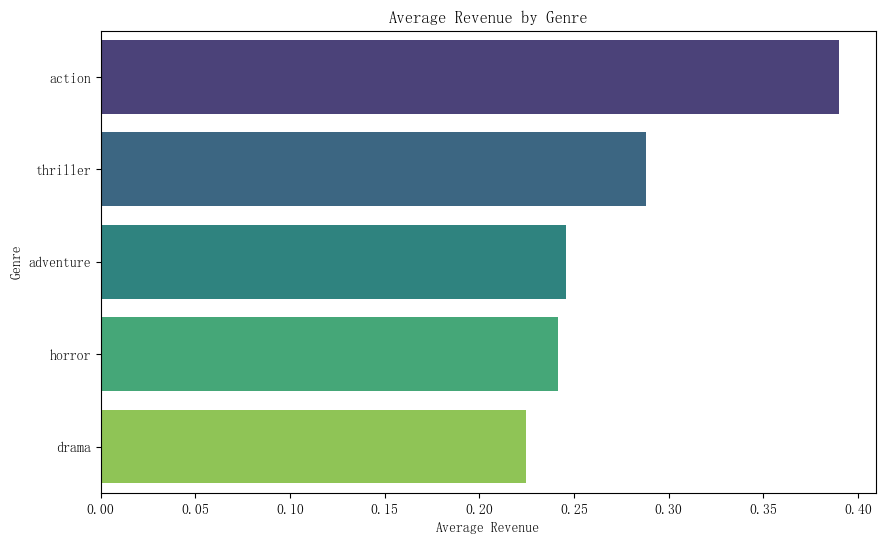

In [8]:
# Plot a bar chart of average revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Revenue', y='Genre', data=avg_revenue_by_genre, palette='viridis', linewidth=0.5)
plt.title('Average Revenue by Genre')
plt.xlabel('Average Revenue')
plt.ylabel('Genre')
plt.show()


From the bar chart, we can see that action ranks first, followed by adventure and thriller, which are more popular among the public.

However, the bar chart does not provide a clear visual representation of the revenue share of the five types of movies. Therefore, we can also create a pie chart to observe the revenue comparison of each type:

### Pie Chart



In [9]:
avg_revenue_by_genre.head(10)

,Genre,Average Revenue
15,action,0.389831
30,thriller,0.288136
16,adventure,0.245763
25,horror,0.241525
21,drama,0.224576


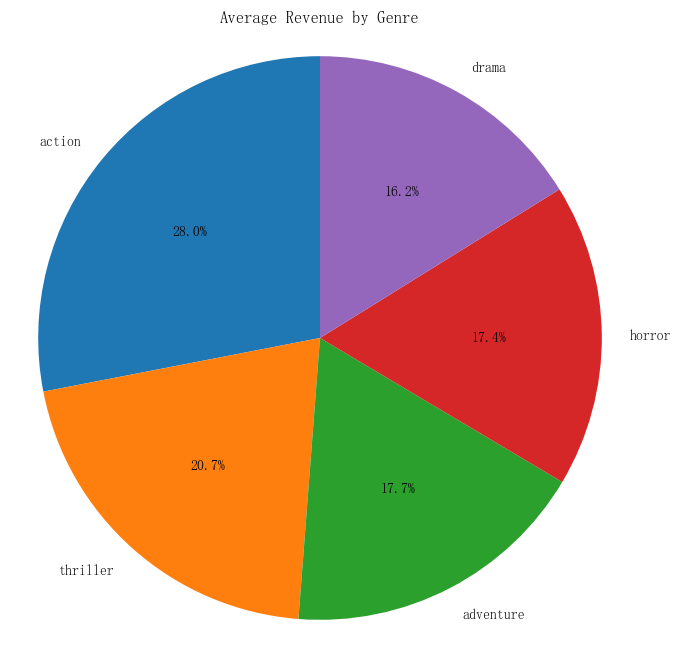

In [12]:
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_revenue_by_genre['Average Revenue'], labels=avg_revenue_by_genre['Genre'], autopct='%1.1f%%', startangle=90)
plt.title('Average Revenue by Genre')
plt.axis('equal')
plt.show()


From the pie chart, we can clearly see the rank of these five movie types. Action movie ranks the first and it took up far more than the rest. Followed by that is thriller movie, and the rest three types take up almost the same. So that it can be seen that action movie bring the most revenue and is most popular among people.


Next, I'd like to get more specific with each movie. So I could rank them by analyzing their revenue and create a bar chart for that.

### Bar Chart

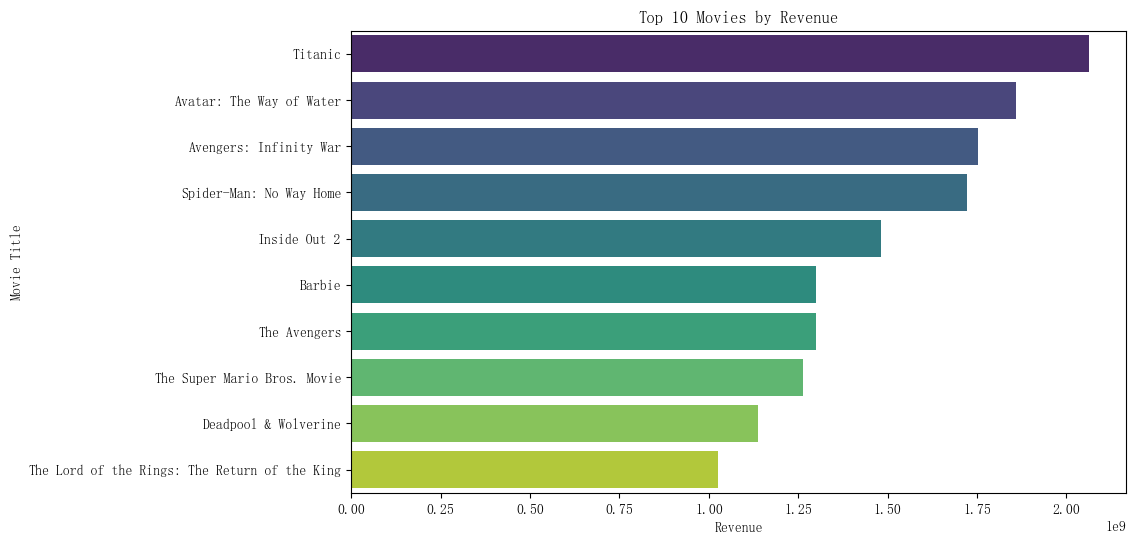

In [23]:
# 3. Top 10 movies by revenue (Bar chart)

top_revenue_movies_all = df.drop_duplicates(subset=['Title']).nlargest(10, 'Revenue')[['Title', 'Revenue']]
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue', y='Title', data=top_revenue_movies_all, palette='viridis', linewidth=0.5)
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.show()


From the above chart, it can be seen clear seen that Titanic is the most popular and classical movie, and the second and third one are Avatar: The way of Water and Avengers: Infinity War. Besides, the 10th is The lord of the kings, and it's revenue is half of the top 1 movie: Titanic, thus, we can draw the conclusion that there is a huge gap for revenue even among the top 10 movies.

To make this ranking more objective, we can rank the 10 films by their ratings, and here is the bar table:


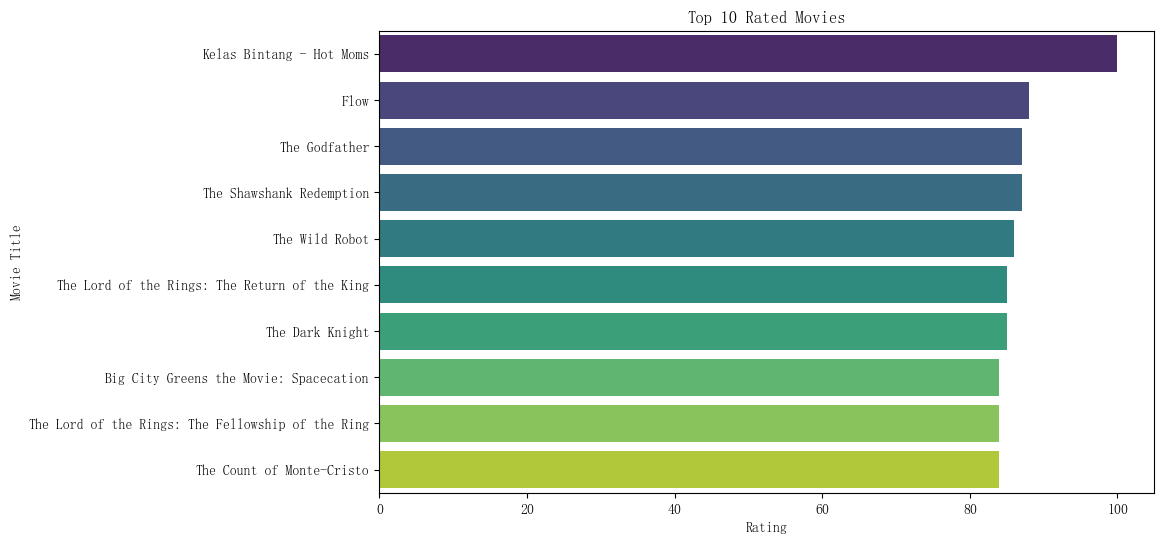

In [24]:

# 4. Top 10 rated movies (Bar chart)
top_rated_movies_all = df.sort_values(by='Rating', ascending=False).head(10)[['Title', 'Rating']]
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Title', data=top_rated_movies_all, palette='viridis', linewidth=0.5)
plt.title('Top 10 Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()


For this bar chart, we can find that is totally different with the above one. The top one movie is Flow and the top 10th movie is No Voltees.
However, the movie The Lord of the rings: The Return of the king can be witnessed in both two bar chart, which means this movieb is quite popular among people.


### Scatter Plot

When we want to study the market law more deeply and explain the economic changes of the film industry, we can consider using the scatter chart to show it.
The scatter plot provides a visual representation of the average revenue generated by movies each year.

Trends Over Time: The plot can reveal trends in the movie industry's financial performance over the years. An upward trend might indicate growing success or increased production budgets, while a downward trend could suggest challenges or changes in consumer preferences.

Outliers: Any years with significantly higher or lower average revenues might be identified as outliers. These could be due to exceptional blockbusters, economic factors, or shifts in the number of movies released.

Market Fluctuations: The scatter plot can show how the movie market fluctuates from year to year, which can be influenced by various factors such as the release of highly anticipated sequels, changes in distribution models, or the impact of technological advancements.

Decadal Shifts: By observing the data across a longer period, one might notice shifts in trends that occur over decades, which could be attributed to broader cultural or technological changes affecting the film industry.


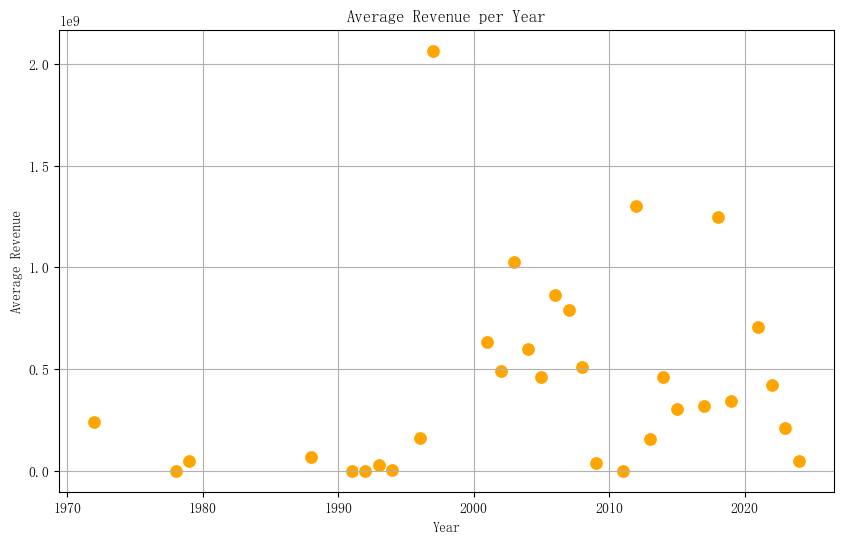

In [25]:
# 5. Average revenue per year (Scatter plot)
avg_revenue_per_year = df.groupby('Year')['Revenue'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Revenue', data=avg_revenue_per_year, color='orange', s=100)
plt.title('Average Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.grid()
plt.show()


This scatter plot shows the trend of average film earnings between 1970 and 2023. Average incomes rose markedly from the late 1990s to the early 2000s, peaking around 2000 and 2010, which could be attributed to the rise of global blockbusters and the globalization of the film market. Since 2010, revenue volatility has increased, and in some years it has decreased significantly, possibly due to the impact of emerging streaming platforms and changes in movie-viewing patterns. High revenue in an individual year may be related to the launch of a blockbuster, while low income years may reflect a downturn in the economy or shifting audience preferences. 

In summary, this scatter plot serves as a concise yet informative tool for analyzing the financial performance of movies on a yearly basis, offering insights into the health and trends of the movie industry over time. This trend analysis provides valuable insights for filmmakers and investors to help them make more informed decisions on future projects.

### matrix relationship plot:

We can also make a matrix relationship plot: we look at three variables: Rating, Revenue, and Year. Each small plot is a scatter plot that shows the relationship between two variables. The diagonal section is the kernel density estimate (KDE) for each variable, representing the distribution of the variables.

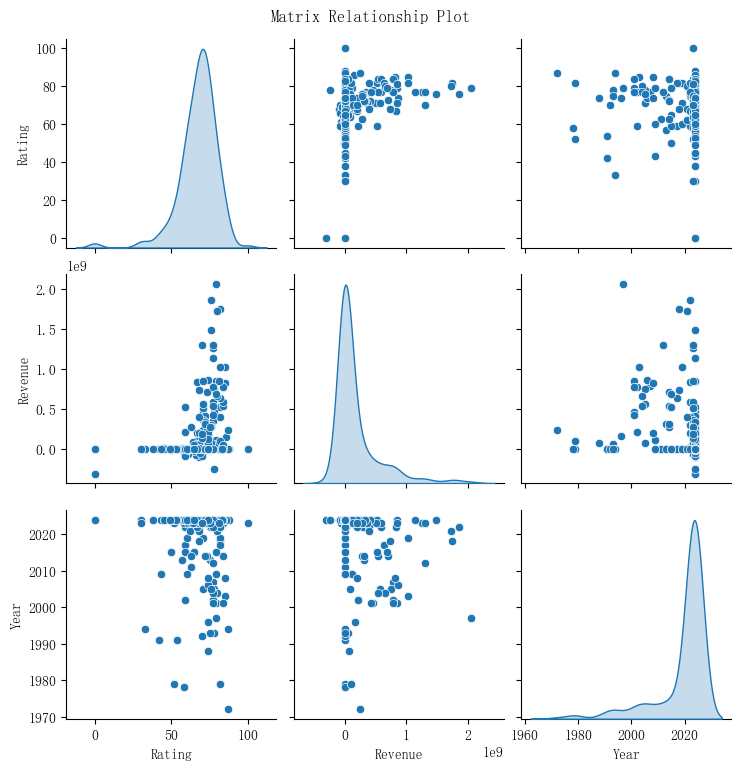

In [26]:
sns.pairplot(df[['Rating', 'Revenue', 'Year']], diag_kind='kde')
plt.suptitle('Matrix Relationship Plot', y=1.02)
plt.show()

This matrix relationship plot reveals insights into the interplay between Rating, Revenue, and Year for movies. The diagonal section shows the distribution of each variable, with the density estimate (KDE) illustrating key patterns. Ratings are mostly concentrated in the higher range, indicating that many movies receive favorable scores. Revenue, on the other hand, is right-skewed, with most films generating lower revenue, while a few blockbusters achieve exceptionally high earnings. The Year variable is primarily concentrated post-2000, which could indicate the expansion of the film market or simply that more comprehensive data is available for recent years.

Looking at the relationships between these variables, the scatter plot for Rating and Revenue suggests that higher-rated movies sometimes achieve higher revenue, but the correlation is not strong, indicating that factors beyond ratings influence a movie’s financial success. Similarly, the relationship between Rating and Year is relatively stable, though there appears to be a trend toward higher ratings post-2000, possibly reflecting improvements in movie quality or shifts in audience preferences.

The relationship between Revenue and Year stands out most clearly, showing a positive trend where revenue has increased significantly since 2000. This may be due to increased budgets, globalization of the film industry, or technological advancements, all of which contributed to higher box office performance over time. Overall, this plot emphasizes that while Revenue and Year have a strong positive correlation, the relationship between Rating and the other variables is less pronounced.


### Correlation Heatmap:
We can also analyze by Correlation heatmap.
The heatmap shows the correlation between the variables, indicating the magnitude and direction of the correlation coefficients by color depth. The value of the correlation coefficient is between -1 and 1. If the correlation coefficient between Rating and Revenue is 0.8, it indicates that there is a strong positive correlation between the two variables, that is, movies with higher ratings usually have higher income. If the correlation coefficient is close to 0, the relationship between the two variables is weak.

C:\Users\LSSSSSSS\.conda\envs\pytorch\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\LSSSSSSS\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


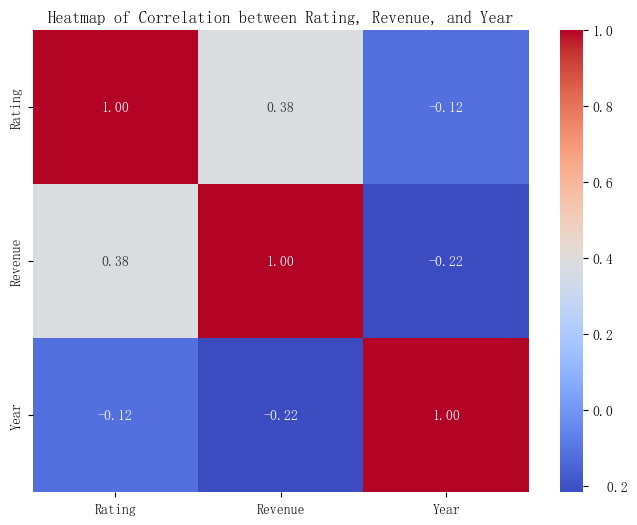

In [27]:

correlation_matrix = df[['Rating', 'Revenue', 'Year']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation between Rating, Revenue, and Year')
plt.show()


This heatmap visualizes the correlation between three variables: Rating, Revenue, and Year. Here’s a breakdown of each relationship shown by the correlation values and colors in the heatmap:

1. **Rating and Revenue** have a moderate positive correlation of 0.41. This suggests that as movie ratings increase, revenue tends to increase as well, although the relationship is not very strong, indicating that other factors likely impact revenue.

2. **Rating and Year** show a weak negative correlation of -0.07. This minimal correlation implies that ratings are not significantly influenced by the year, meaning that average ratings have remained fairly stable over time.

3. **Revenue and Year** display a slightly stronger negative correlation of -0.20. This suggests a small tendency for revenue to decrease over the years, which could indicate market saturation, increased competition, or other economic factors affecting box office performance.

The color gradient emphasizes these values: red indicates strong positive correlations, while blue shows negative correlations. Here, the most notable relationship is between Rating and Revenue, while Year has weaker correlations with both other variables. Overall, the heatmap provides a quick visual summary, showing that Rating has the strongest association with Revenue among the three variables.

## Conclusion and discussion
### Conclusion

In this project, we analyzed various aspects of the movie industry by examining key attributes such as revenue, genre, rating, and release year. Through comprehensive data visualization techniques, we discovered that genres like action and adventure consistently generate higher revenue, underscoring their popularity with audiences. Our analysis of top-grossing movies further emphasized that blockbuster films, like *Titanic* and *Avatar*, bring in significantly higher revenue compared to other movies, highlighting the financial impact of high-budget productions and franchise films. Furthermore, by looking at the trends in average revenue per year, we observed that the movie industry experienced significant growth from the late 1990s onward, likely due to the rise of global blockbusters, increased budgets, and the expansion of the film market globally.

In our correlation analysis, we found a moderate positive correlation between ratings and revenue, suggesting that while high ratings may contribute to a movie's success, other factors also play a role. Additionally, there was a slight downward trend in revenue over time, hinting at potential shifts in audience preferences and the increasing competition from digital platforms. Overall, these findings provide valuable insights into what makes movies successful and how the industry has evolved.

### Discussion

This analysis offers several implications for both the movie industry and researchers interested in film data. The revenue dominance of genres like action and adventure suggests that filmmakers and studios might benefit from investing in high-energy, visually immersive productions that appeal to a broad audience. However, the scatter plot of ratings and revenue highlights that ratings alone do not guarantee financial success. This insight could help guide marketing strategies by emphasizing that both quality and strategic release timing are crucial for a film's success.

The decadal trend analysis illustrates the profound impact of globalization, technological advancements, and shifting consumer behaviors on box office revenue. For example, the increasing competition from streaming services and changes in viewing patterns have introduced new challenges for traditional cinemas, urging studios to adapt their strategies to meet evolving audience expectations.

Finally, our findings suggest that movie ratings, while important, are not the sole factor influencing revenue. This understanding could inspire future researchers to delve deeper into the complex relationships between additional variables such as marketing budgets, star power, and social media presence. By building on the groundwork of this study, the film industry can continue to innovate and maximize the potential of data-driven decision-making.
